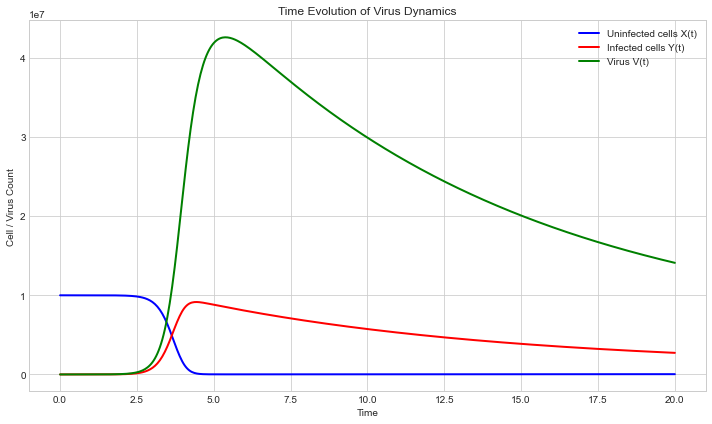

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-whitegrid')

# パラメータ設定（単位は適宜調整）
lambda_val = 1e5      # 新規未感染細胞産生率
mu = 0.01             # 未感染細胞の自然死亡率
beta = 2e-7           # 感染率係数
a = 0.1               # 感染細胞の除去率（死亡率）
k = 10.0             # 1感染細胞あたりウイルス産生数
u = 2.0               # ウイルス消失率

def virus_model(t, y):
    X, Y, V = y
    dXdt = lambda_val - mu * X - beta * X * V
    dYdt = beta * X * V - a * Y
    dVdt = k * Y - u * V
    return [dXdt, dYdt, dVdt]

# 初期状態: ウイルス侵入前はXがλ/μの平衡状態、感染細胞・ウイルスはごくわずか
X0 = lambda_val/mu
y0 = [X0, 1.0, 100.0]

t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 500)
sol = solve_ivp(virus_model, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], 'b-', lw=2, label='Uninfected cells X(t)')
plt.plot(sol.t, sol.y[1], 'r-', lw=2, label='Infected cells Y(t)')
plt.plot(sol.t, sol.y[2], 'g-', lw=2, label='Virus V(t)')
plt.xlabel("Time")
plt.ylabel("Cell / Virus Count")
plt.title("Time Evolution of Virus Dynamics")
plt.legend()
plt.tight_layout()
plt.savefig('VirusDynamics_TimeEvolution.pdf', format='pdf')
plt.show()

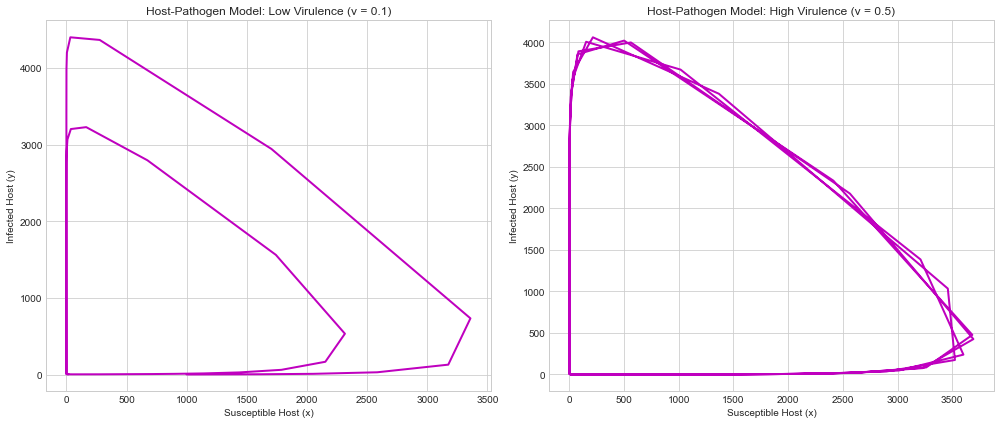

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-whitegrid')

# パラメータ設定
r = 1.0         # 宿主増加率
u_host = 0.1    # 自然死亡率
beta_infect = 0.002  # 感染伝播速度
# 毒性 (追加死亡率) を低/高で比較
nu_low = 0.1
nu_high = 0.5

def host_pathogen_model(t, y, r, u, beta, nu):
    x, y_inf = y
    dxdt = r*x - u*x - beta*x*y_inf
    dydt = beta*x*y_inf - (u+nu)*y_inf
    return [dxdt, dydt]

# 初期条件
y0 = [1000, 1]  # 大部分が未感染で、感染者は1

t_span = (0, 80)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# 低毒性の場合のシミュレーション
sol_low = solve_ivp(host_pathogen_model, t_span, y0, t_eval=t_eval, args=(r, u_host, beta_infect, nu_low))
# 高毒性の場合のシミュレーション
sol_high = solve_ivp(host_pathogen_model, t_span, y0, t_eval=t_eval, args=(r, u_host, beta_infect, nu_high))

fig, axs = plt.subplots(1, 2, figsize=(14,6))
# 低毒性の場合
axs[0].plot(sol_low.y[0], sol_low.y[1], 'm-', lw=2)
axs[0].set_title("Host-Pathogen Model: Low Virulence (ν = 0.1)")
axs[0].set_xlabel("Susceptible Host (x)")
axs[0].set_ylabel("Infected Host (y)")
axs[0].grid(True)

# 高毒性の場合
axs[1].plot(sol_high.y[0], sol_high.y[1], 'm-', lw=2)
axs[1].set_title("Host-Pathogen Model: High Virulence (ν = 0.5)")
axs[1].set_xlabel("Susceptible Host (x)")
axs[1].set_ylabel("Infected Host (y)")
axs[1].grid(True)

plt.tight_layout()
plt.savefig('HostPathogen_PhasePlane_Virulence.pdf', format='pdf')
plt.show()